# Income Prediction

## Objective

Objective of this project is to use classification models to predict if a person's income is less than or greater than 50K

## Dataset

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [82]:
# Load the dataset
columns =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
adult = pd.read_csv("../ProjectData/adult/adult.data", header=None, names = columns)
print(adult.shape)
adult.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
adult[adult['workclass']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Number of categorical variables : 9  
Number of numerical variables:  6

In [84]:
num_cols =['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']
cat_cols =['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
target_col = ['income']

1. The dataset has a total of 32561 records
2. The dataset has 14 independent variable and one dependent variable
3. The dataset has 8 categorical features - workclass, education, marital-status, occupation, relationship, race, sex, native-country
4. The dataset has 6 numerical features - age,fnlwgt,education-num,capital-gain, capital-loss, hours-per-week
5. Age -   
6. workclass -   
7. fnlwgt -
8. education -
9. education-num -
10. marital-status -
11. occupation -
12. relationship -
13. race -
14. sex -
15. capital-gain -
16. capital-loss -
17. hours-per-week -
18. native-country -  
19. income - This is the target column to predict. Takes value >=50K or <=50K


## Exploratory Data Analysis

### Univariate Analysis

In [85]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


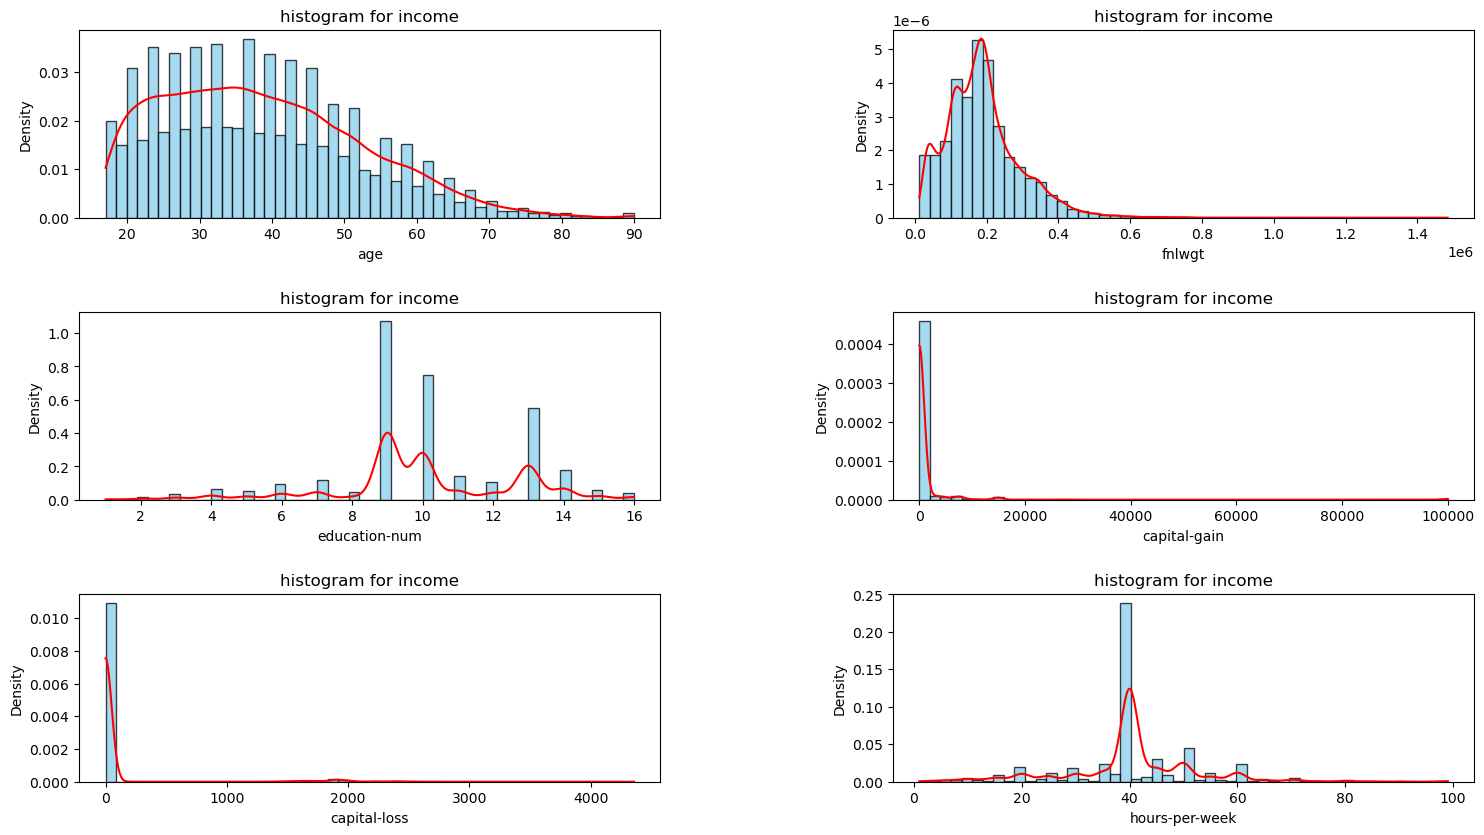

In [86]:
fig, ax = plt.subplots(3, 2, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=0.5, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(num_cols):
    kde = stats.gaussian_kde(adult[col])
    x = np.linspace(adult[col].min(), adult[col].max(), 1000)
    ax[i].plot(x, kde(x), color='red')
    ax[i].hist(adult[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    ax[i].set_title(f'histogram for income')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Density')
#fig.delaxes(ax[i+1])

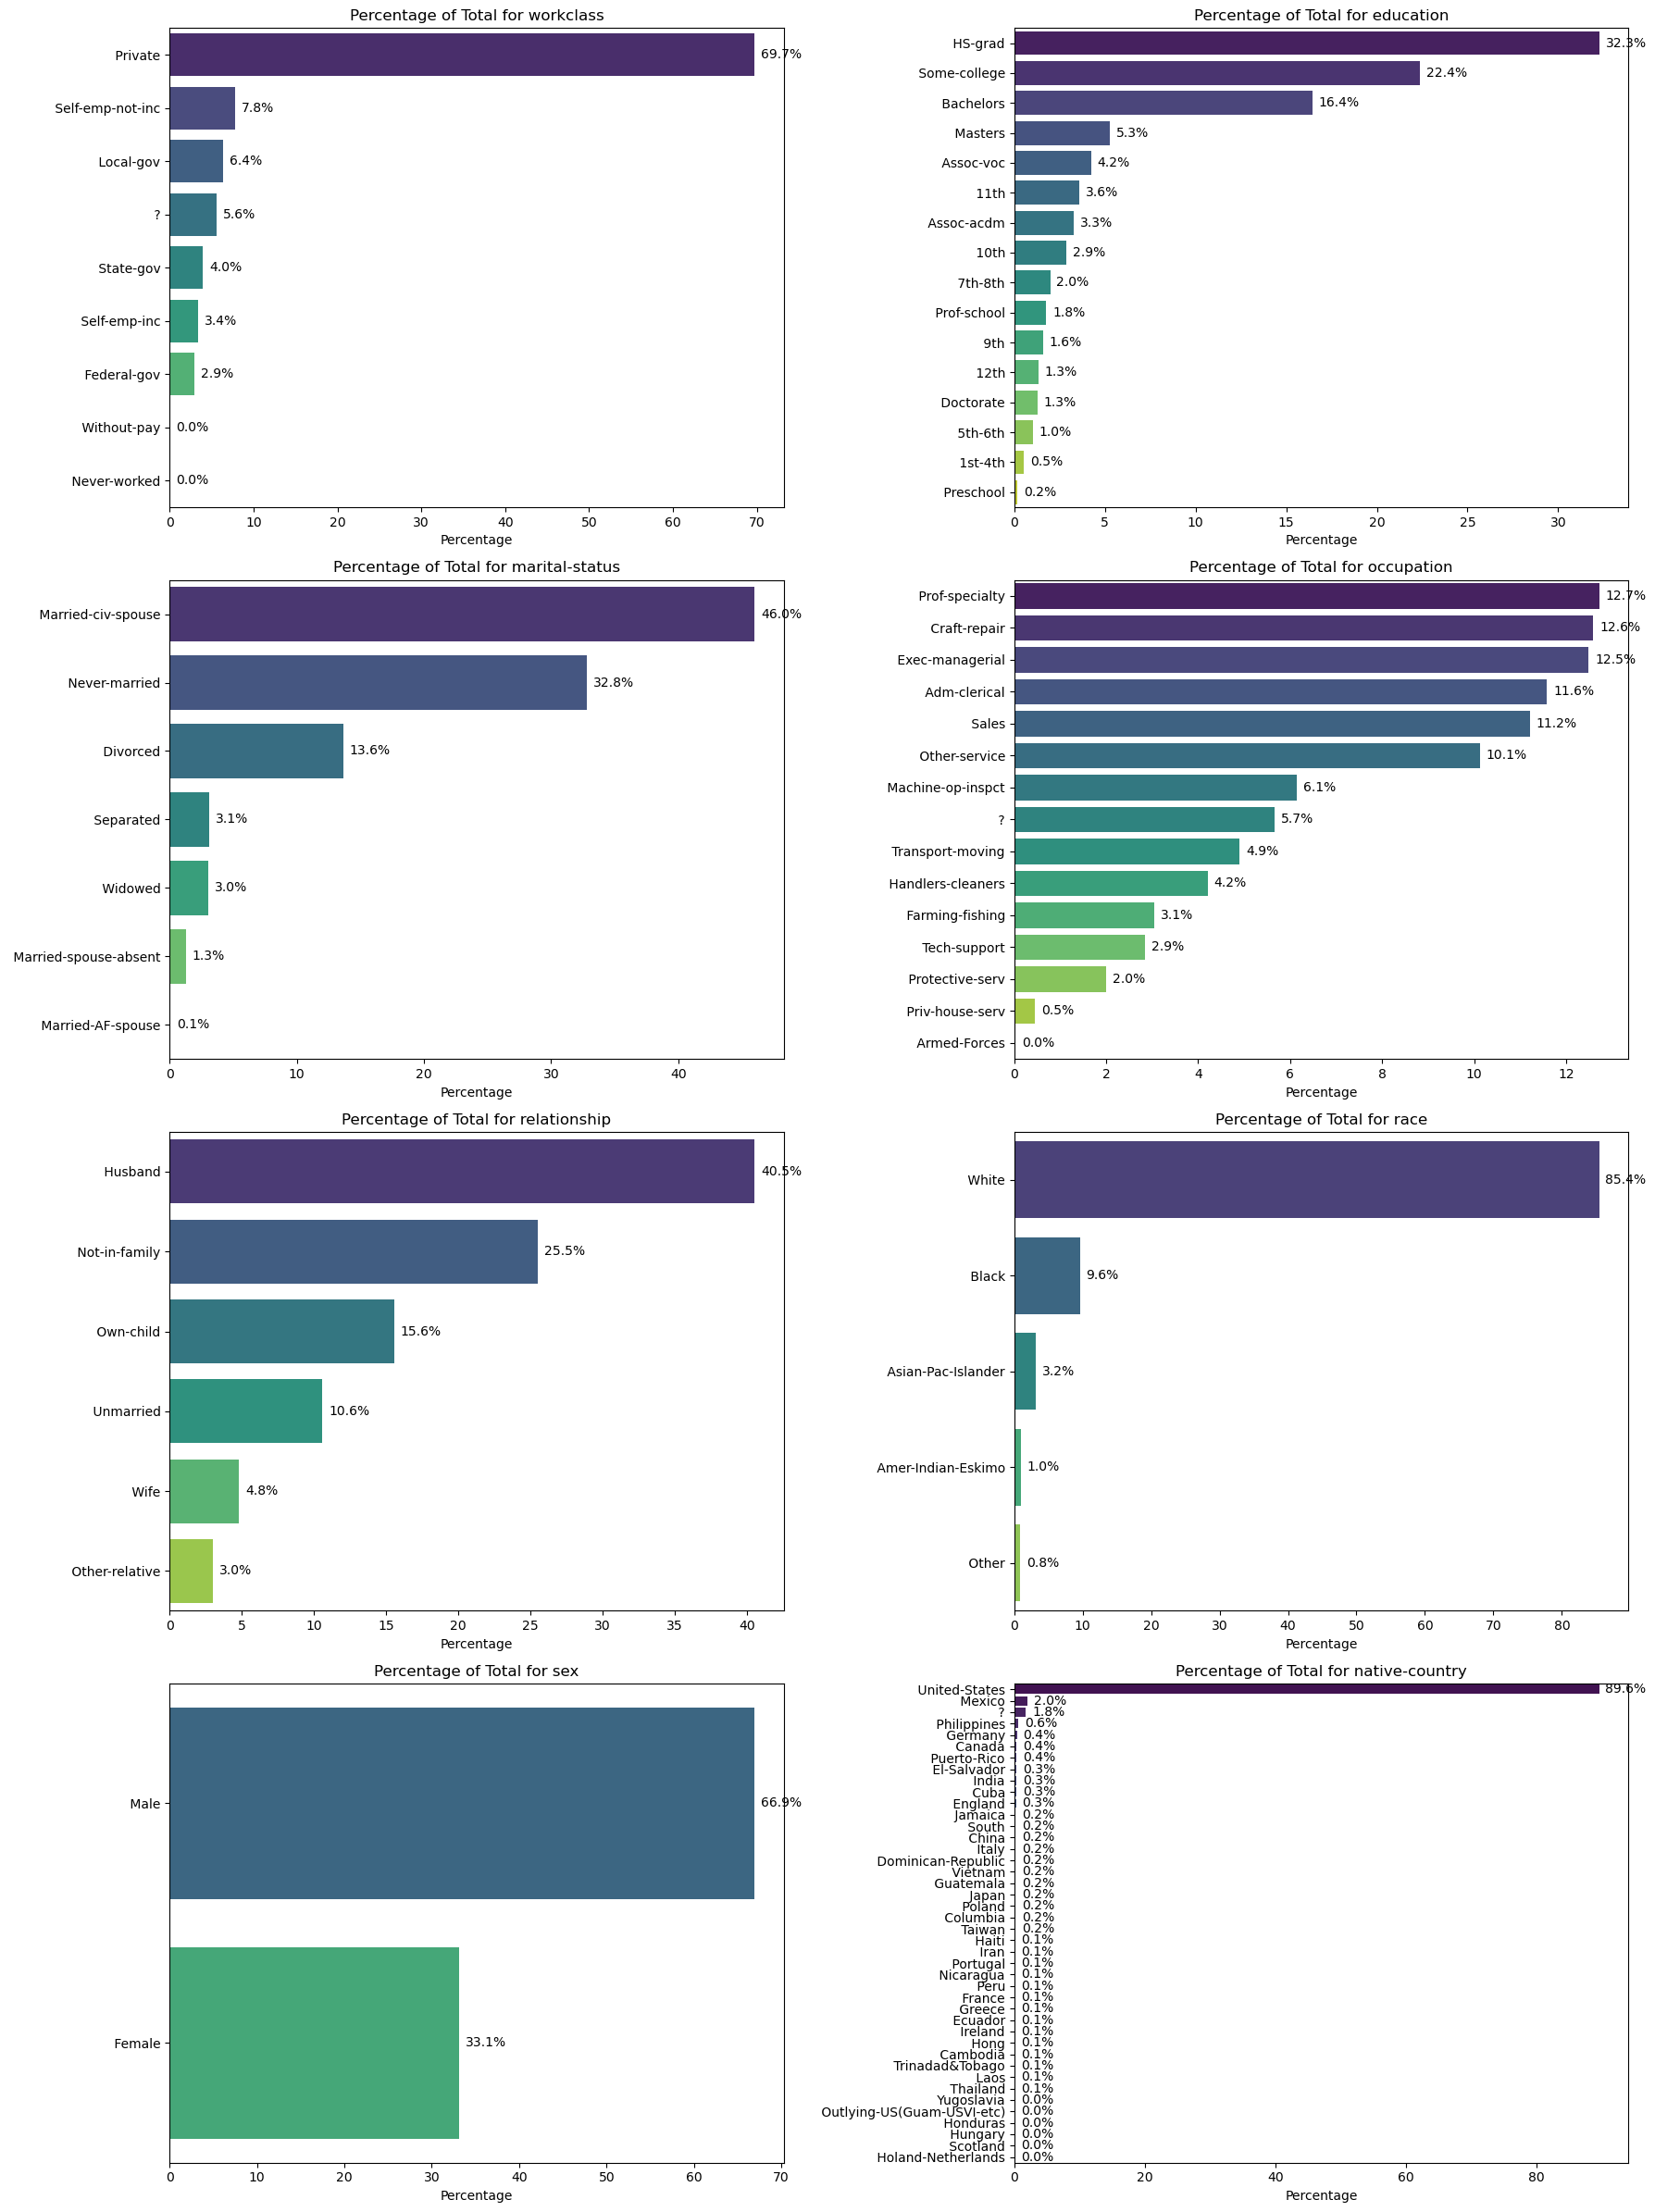

In [87]:
# find the percentage of category for each variable
def percent_of_total(second_column):
    value_counts = adult[second_column].value_counts()
    percent_total = value_counts/sum(value_counts)
    return percent_total*100
# Setting up the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))
axes = axes.flatten()

# Plotting horizontal bar plots
for ax, col in zip(axes, cat_cols):
    percent_total = percent_of_total(col)
    bars = sns.barplot(x=percent_total.values, y=percent_total.index, ax=ax, palette='viridis')
     # Annotating the bars with percentage values
    for bar, perc in zip(bars.patches, percent_total.values):
        ax.annotate(f'{perc:.1f}%',
                    xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords='offset points',
                    ha='left', va='center')
    ax.set_title(f'Percentage of Total for {col}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [88]:
adult['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [89]:
adult[adult['workclass']==' ?']['occupation'].value_counts()

 ?    1836
Name: occupation, dtype: int64

# Bivariate Analysis

In [96]:
# Function to encode categorical columns and the target column
def encode_columns(df, cat_cols):
    df_encoded = df.copy()  # Create a copy of the DataFrame to work on
    le = LabelEncoder()
    for col in cat_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col])  # Convert to string to handle any type of data
    #df_encoded[target_col] = le.fit_transform(df_encoded[target_col])  # Encode the target column
    return df_encoded

# Encode the categorical and target columns
adult_encoded = encode_columns(adult, cat_cols)
adult_encoded = encode_columns(adult_encoded, target_col)
adult_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [99]:
adult_missing = adult_encoded[adult_encoded['workclass']!=' ?']
len(adult_missing)

32561

In [97]:
adult_encoded.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


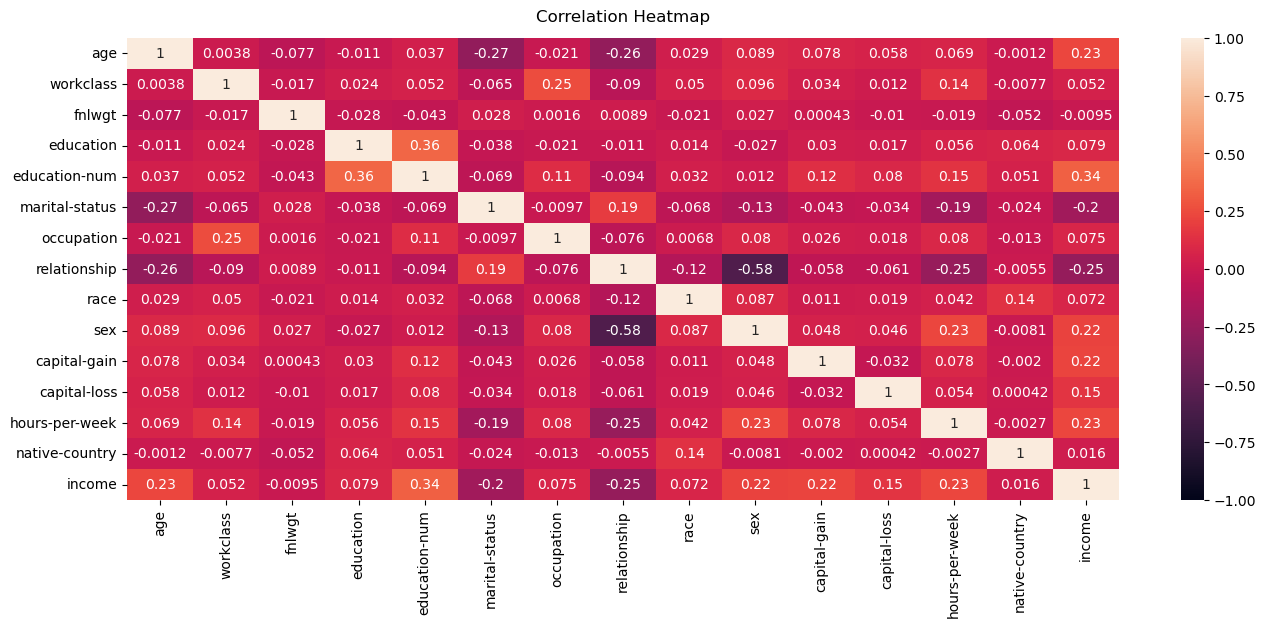

In [101]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(adult_encoded.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


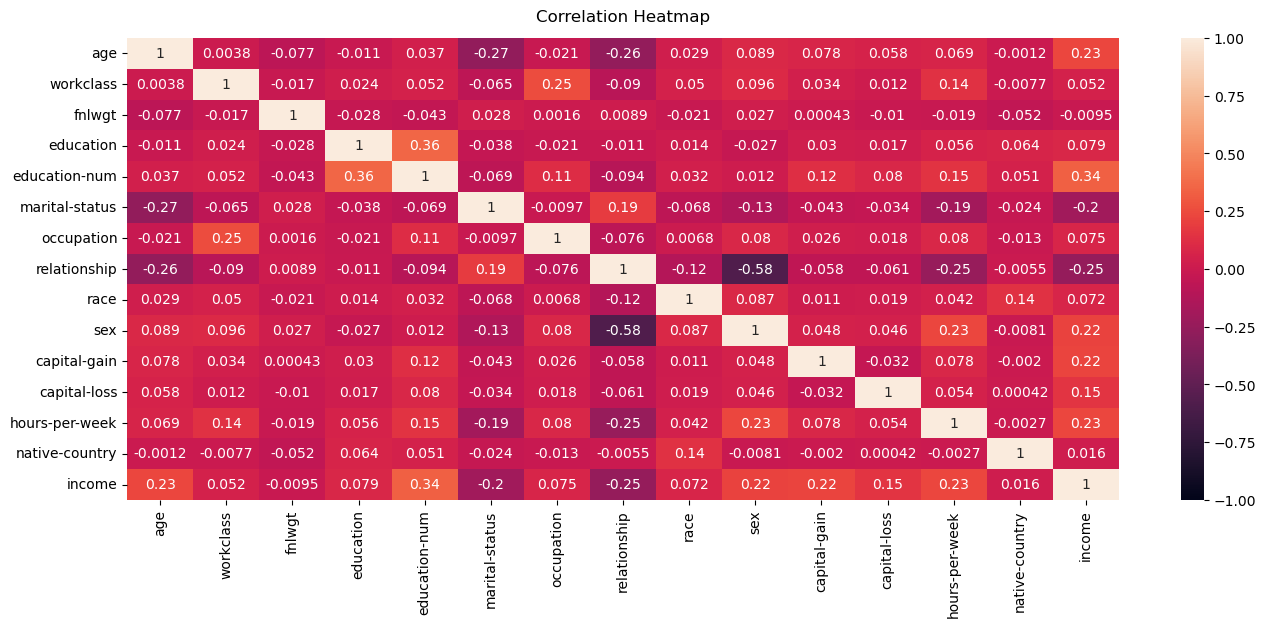

In [102]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(adult_missing.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e  
https://towardsdatascience.com/seaborn-heatmap-for-visualising-data-correlations-66cbef09c1fe

1. Years of education, age, capital-gain, sex, hours-per-week has moderate positive correlations and has a significant role in determining the income
2. Education, occupation, race, capital-loss, workclass, native-country has a weak positive correlation
3. Relationship, marital-status has a weak negative correlations
4. Fnlwgt has very weak negative correlation and does not have any inflluence on income.

In [50]:
adult.groupby(['income','workclass']).size().unstack()

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,1645.0,589.0,1476.0,7.0,17733.0,494.0,1817.0,945.0,14.0
>50K,191.0,371.0,617.0,NaN,4963.0,622.0,724.0,353.0,NaN


In [31]:
# calculate proportion for each colunmn
def percent_of_total(column):
    percent_of_total = adult.groupby([column, target_col[0]]).size().unstack()
    for i in range(len(percent_of_total)):
        percent_of_total.iloc[i,:] = percent_of_total.iloc[i,:]/sum(percent_of_total.iloc[i,:])
    return percent_of_total

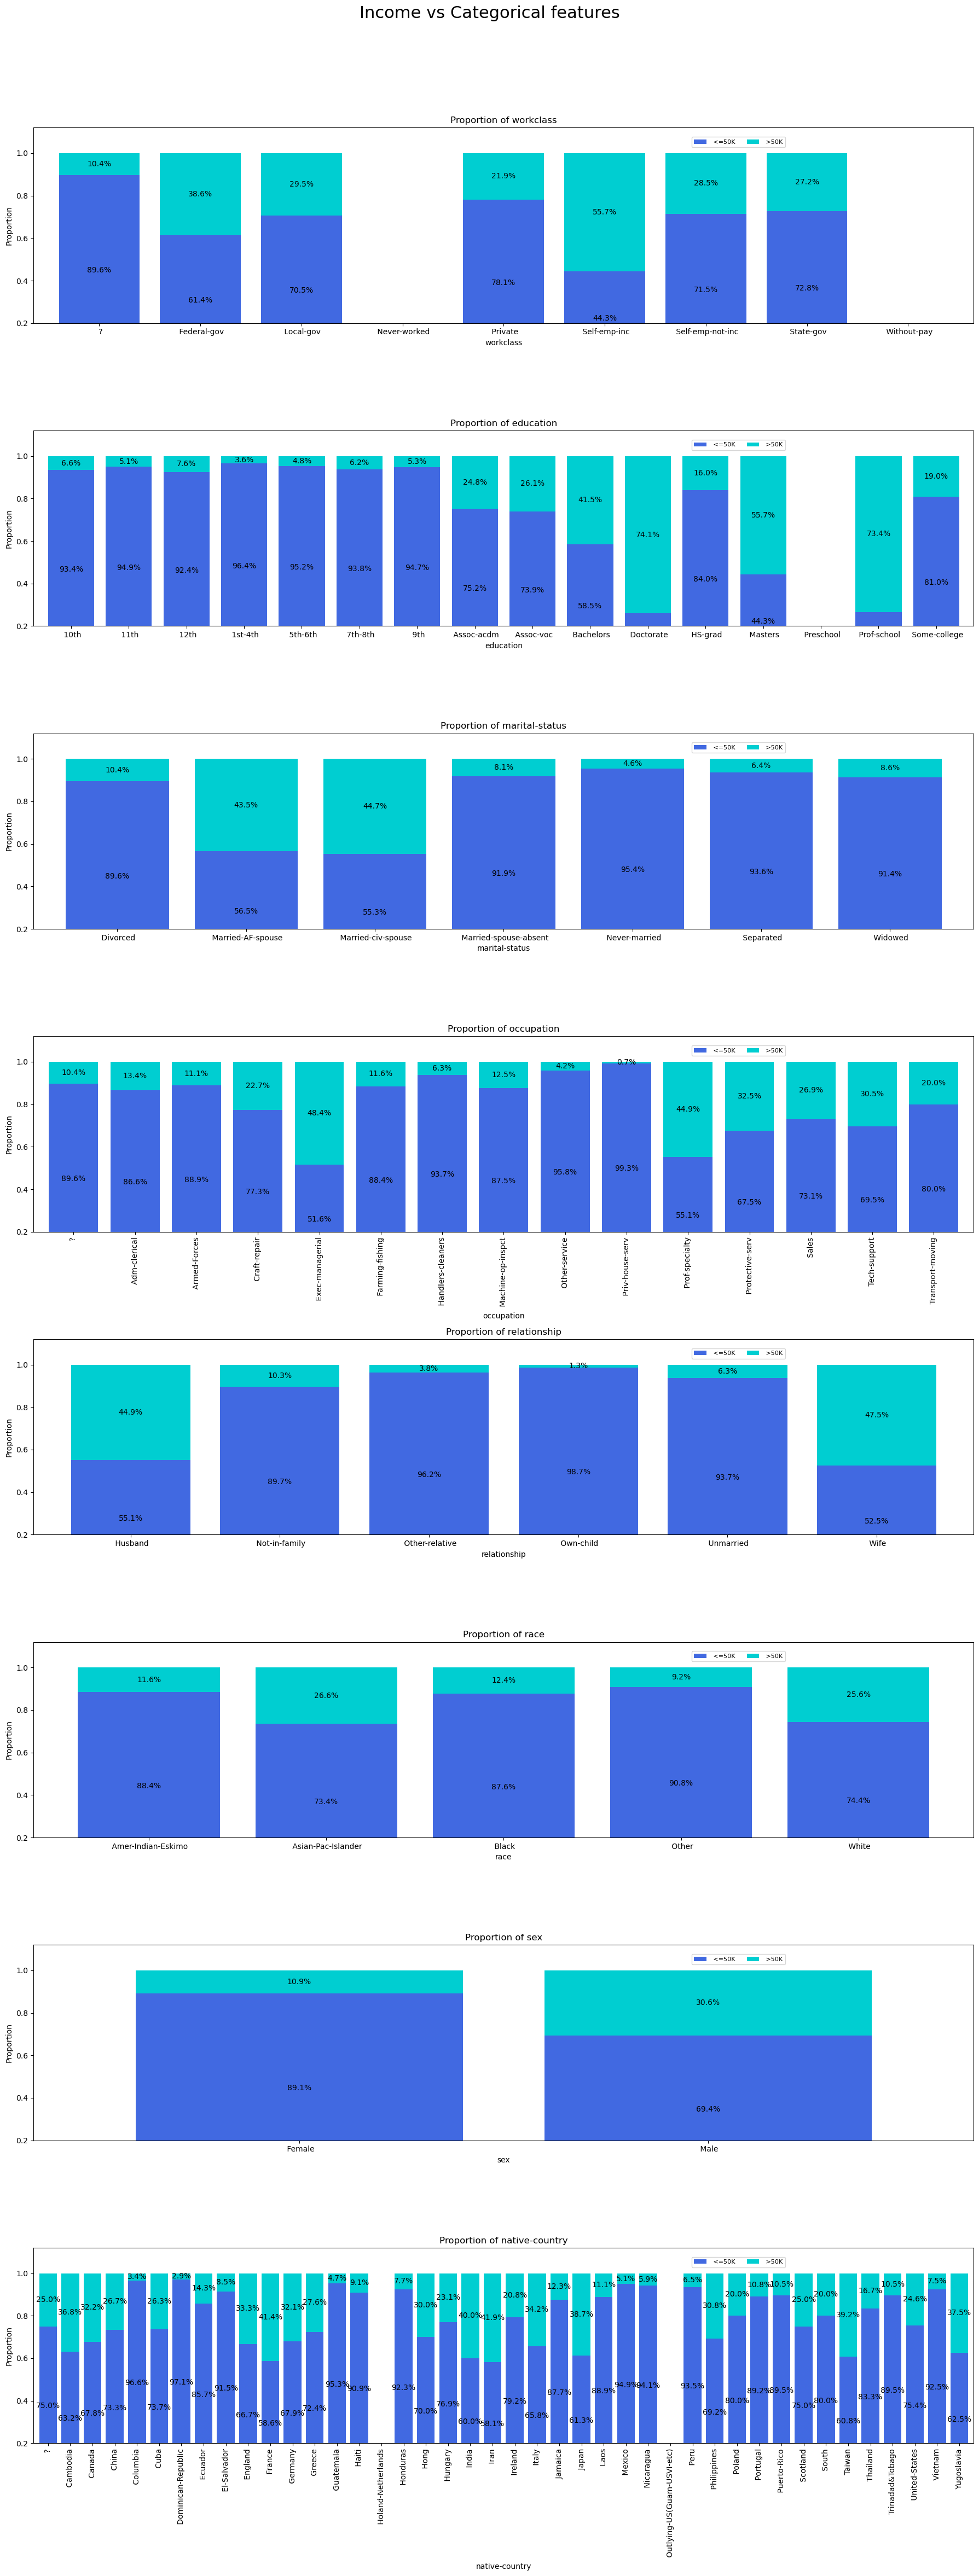

In [54]:
fig, ax = plt.subplots(8, 1, figsize=(18, 48))
ax = ax.flatten()
cmp = ListedColormap(['royalblue', 'darkturquoise'])
for i,col in enumerate(cat_cols):
    proportion = percent_of_total(col)
    bars = proportion.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp, legend=False, ylabel='Proportion', sharey=True)
    for bar_container in bars.containers:
        for bar in bar_container:
            height = bar.get_height()
            ax[i].annotate(f'{height:.1%}',
                           xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                           xytext=(0, 0),  # No offset
                           textcoords="offset points",
                           ha='center', va='center', fontsize=10, color='black')
    ax[i].set_title(f'Proportion of {col}')
    ax[i].legend(loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[i].set_ylim([0.2, 1.12])
    rotation = 90 if i==7 or i==3 else 0
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=rotation)

plt.suptitle('Income vs Categorical features', fontsize=22)
#plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.show()

In [257]:
adult[adult['workclass']==' ?'].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390
std,20.334587,107089.902252,2.601986,5147.323872,354.685264,14.909903
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,21.000000,117771.250000,9.000000,0.000000,0.000000,20.000000
50%,35.000000,175617.000000,9.000000,0.000000,0.000000,36.000000
75%,61.000000,234568.500000,10.000000,0.000000,0.000000,40.000000
max,90.000000,981628.000000,16.000000,99999.000000,4356.000000,99.000000


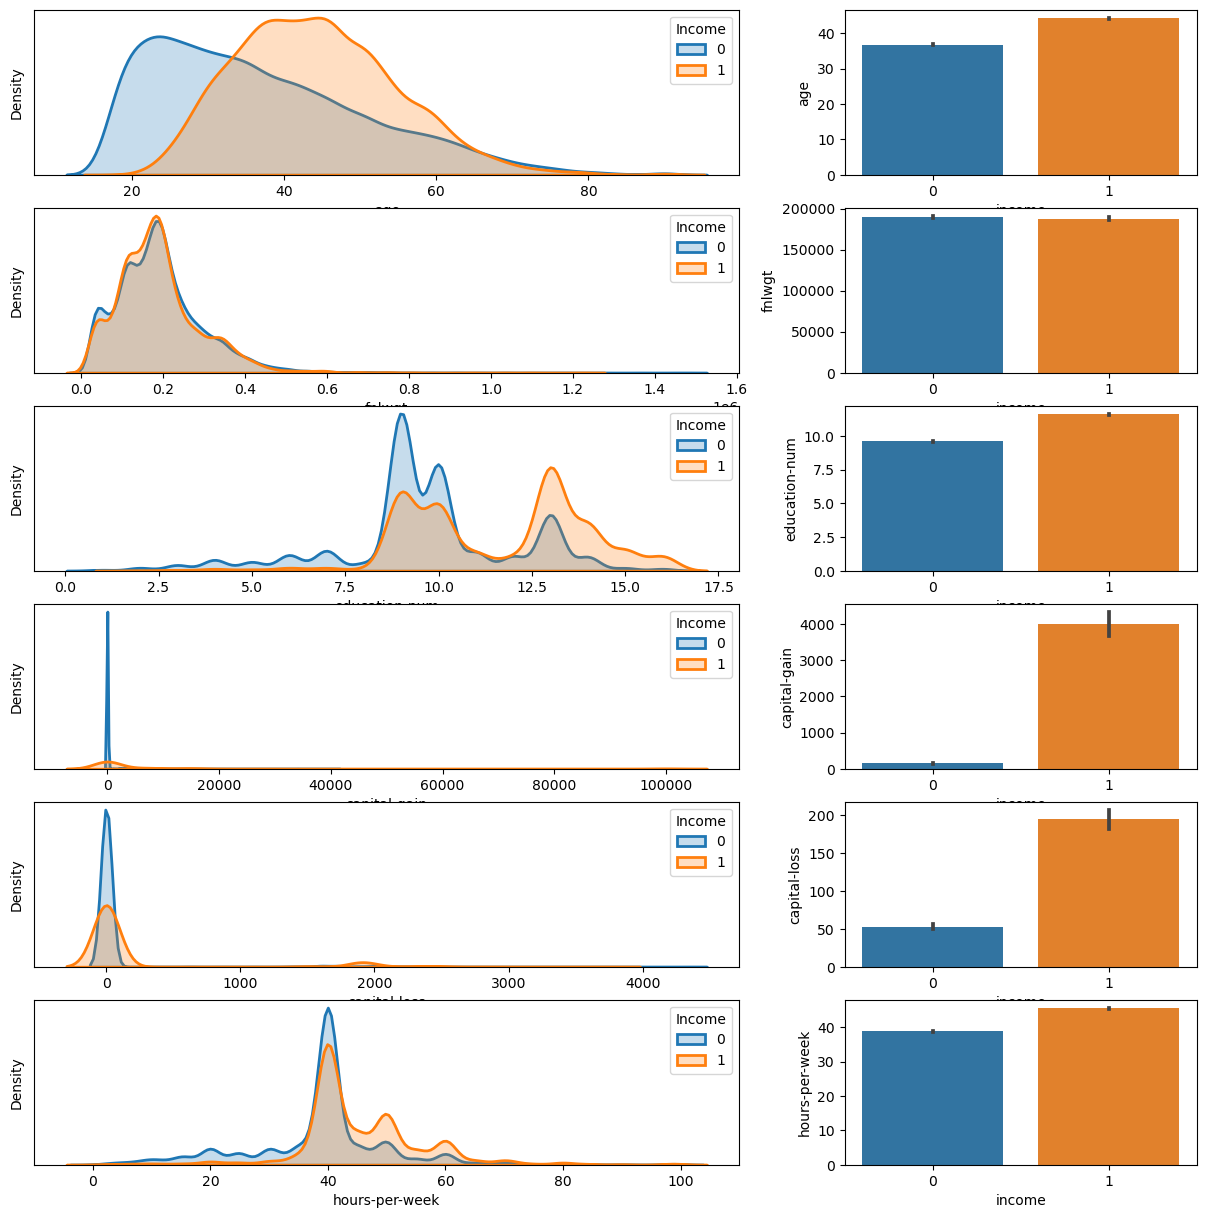

In [219]:
def kdeplot(col, color):
    kde = stats.gaussian_kde(adult_encoded[col])
    x = np.linspace(adult_encoded[col].min(), income[col].max(), 1000)
    ax[i,0].plot(x, kde(x), color=color)

fig, ax = plt.subplots(6, 2, figsize=(15, 15), gridspec_kw={'width_ratios': [2, 1]})
for i,col in enumerate(num_cols):
    sns.kdeplot(data=adult_encoded[adult_encoded[target_col[0]]==0], x=col, fill=True, linewidth=2, ax=ax[i,0], label='0')
    sns.kdeplot(data=adult_encoded[adult_encoded[target_col[0]]==1], x=col, fill=True, linewidth=2, ax=ax[i,0], label='1')
    graph = sns.barplot(data=adult_encoded, x=target_col[0], y=col, ax=ax[i,1])
    ax[i,0].set_yticks([])
    ax[i,0].legend(title='Income', loc='upper right')
    

https://matplotlib.org/3.5.0/tutorials/intermediate/gridspec.html